### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import os

## encoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [3]:
File_Path = os.path.join(os.getcwd(), 'Unemployment in India.csv')
df = pd.read_csv(File_Path)
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


df.shape

In [5]:
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')

### Preprocessing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   region                                   740 non-null    object 
 1   date                                     740 non-null    object 
 2   frequency                                740 non-null    object 
 3   estimated_unemployment_rate_(%)          740 non-null    float64
 4   estimated_employed                       740 non-null    float64
 5   estimated_labour_participation_rate_(%)  740 non-null    float64
 6   area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [8]:
df.describe()

,estimated_unemployment_rate_(%),estimated_employed,estimated_labour_participation_rate_(%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [9]:
df.isnull().sum()

region                                     28
date                                       28
frequency                                  28
estimated_unemployment_rate_(%)            28
estimated_employed                         28
estimated_labour_participation_rate_(%)    28
area                                       28
dtype: int64

In [10]:
df.duplicated().sum()

27

In [11]:
df[df.duplicated()]

,region,date,frequency,estimated_unemployment_rate_(%),estimated_employed,estimated_labour_participation_rate_(%),area
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.dtypes

region                                      object
date                                        object
frequency                                   object
estimated_unemployment_rate_(%)            float64
estimated_employed                         float64
estimated_labour_participation_rate_(%)    float64
area                                        object
dtype: object

In [13]:
#### Imputting

## FLoatting

df['estimated_unemployment_rate_(%)'].fillna(df['estimated_unemployment_rate_(%)'].median(), inplace = True)
df['estimated_employed'].fillna(df['estimated_employed'].median(), inplace = True)
df['estimated_labour_participation_rate_(%)'].fillna(df['estimated_labour_participation_rate_(%)'].median(), inplace = True)

## string

df['region'].fillna(df['region'].mode()[0], inplace = True)
df['date'].fillna(df['date'].mode()[0], inplace = True)
df['frequency'].fillna(df['frequency'].mode()[0], inplace = True)
df['area'].fillna(df['area'].mode()[0], inplace = True)

In [14]:
df.isnull().sum()

region                                     0
date                                       0
frequency                                  0
estimated_unemployment_rate_(%)            0
estimated_employed                         0
estimated_labour_participation_rate_(%)    0
area                                       0
dtype: int64

<Axes: >

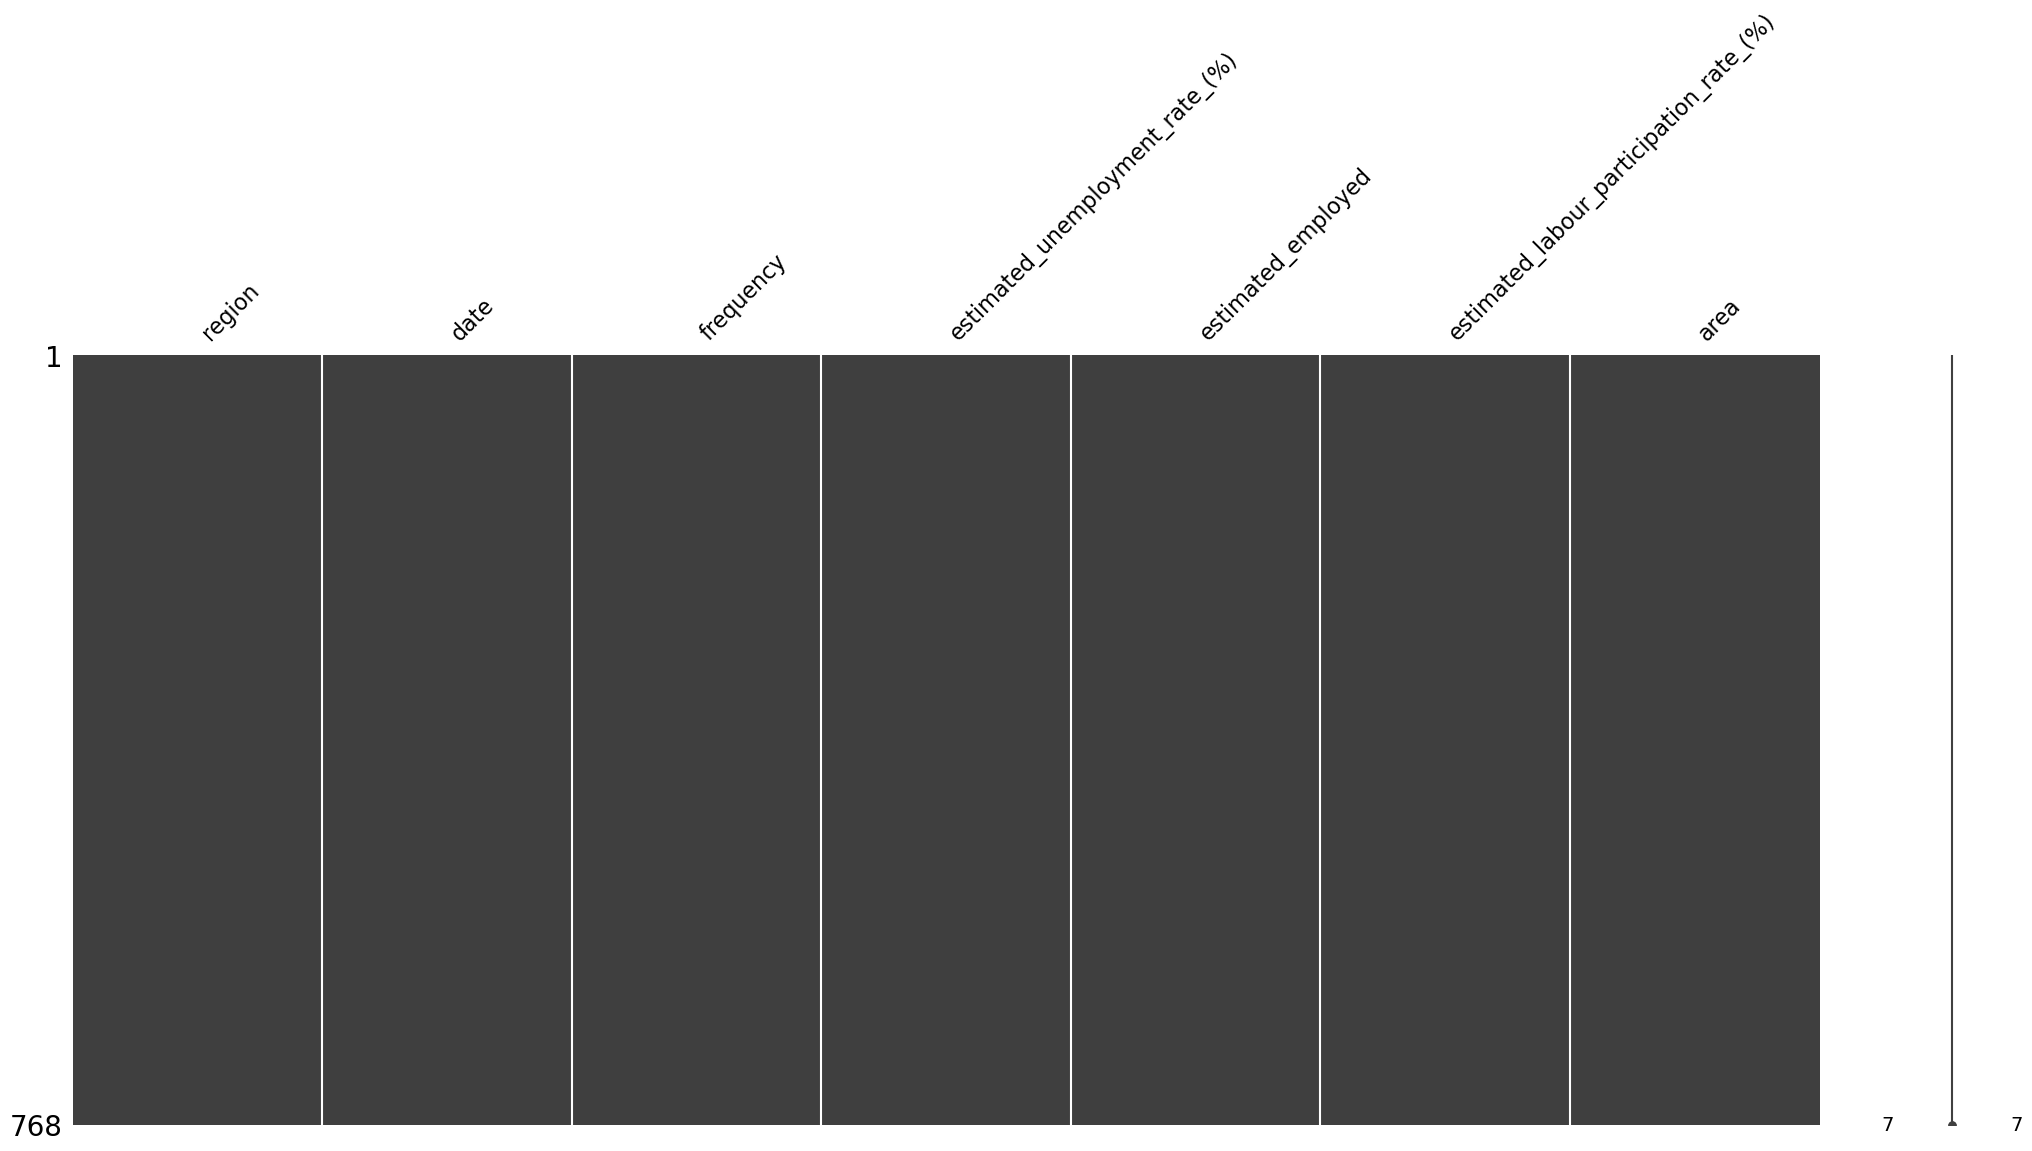

In [15]:
msno.matrix(df)

In [16]:
df[df.duplicated()]

,region,date,frequency,estimated_unemployment_rate_(%),estimated_employed,estimated_labour_participation_rate_(%),area
360,Andhra Pradesh,30-11-2019,Monthly,8.35,4744178.5,41.16,Urban
361,Andhra Pradesh,30-11-2019,Monthly,8.35,4744178.5,41.16,Urban
362,Andhra Pradesh,30-11-2019,Monthly,8.35,4744178.5,41.16,Urban
363,Andhra Pradesh,30-11-2019,Monthly,8.35,4744178.5,41.16,Urban
364,Andhra Pradesh,30-11-2019,Monthly,8.35,4744178.5,41.16,Urban
365,Andhra Pradesh,30-11-2019,Monthly,8.35,4744178.5,41.16,Urban
366,Andhra Pradesh,30-11-2019,Monthly,8.35,4744178.5,41.16,Urban
367,Andhra Pradesh,30-11-2019,Monthly,8.35,4744178.5,41.16,Urban
368,Andhra Pradesh,30-11-2019,Monthly,8.35,4744178.5,41.16,Urban
369,Andhra Pradesh,30-11-2019,Monthly,8.35,4744178.5,41.16,Urban


In [17]:
df = df.drop_duplicates()

In [18]:
df.duplicated().sum()

0

In [19]:
df.describe()

,estimated_unemployment_rate_(%),estimated_employed,estimated_labour_participation_rate_(%)
count,741.000000,7.410000e+02,741.000000
mean,11.783306,7.201140e+06,42.628138
std,10.714796,8.083027e+06,8.105792
min,0.000000,4.942000e+04,13.330000
25%,4.660000,1.192616e+06,38.070000
50%,8.350000,4.744178e+06,41.160000
75%,15.880000,1.126583e+07,45.490000
max,76.740000,4.577751e+07,72.570000


In [20]:
df[df['estimated_unemployment_rate_(%)'] == 0]

,region,date,frequency,estimated_unemployment_rate_(%),estimated_employed,estimated_labour_participation_rate_(%),area
25,Assam,30-06-2020,Monthly,0.0,7544937.0,34.38,Rural
51,Chhattisgarh,30-04-2020,Monthly,0.0,6534321.0,39.43,Rural
77,Goa,29-02-2020,Monthly,0.0,171672.0,36.11,Rural
231,Puducherry,31-05-2019,Monthly,0.0,172474.0,43.08,Rural
232,Puducherry,30-06-2019,Monthly,0.0,184527.0,45.95,Rural
233,Puducherry,31-07-2019,Monthly,0.0,139227.0,34.56,Rural
235,Puducherry,30-09-2019,Monthly,0.0,175718.0,43.34,Rural
237,Puducherry,30-11-2019,Monthly,0.0,142787.0,35.00,Rural
274,Sikkim,30-04-2020,Monthly,0.0,133399.0,37.72,Rural
617,Puducherry,30-06-2019,Monthly,0.0,304369.0,37.73,Urban


In [21]:
df.loc[df['estimated_unemployment_rate_(%)'] == 0, 'estimated_unemployment_rate_(%)'] = df['estimated_unemployment_rate_(%)'].median()

In [22]:
for cols in df.select_dtypes(exclude = 'number').columns:
    print(f'Name of column --> {cols}')
    print(f'unique of columns --> {df[cols].unique()}')
    print('_' * 50)

Name of column --> region
unique of columns --> ['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' 'Chandigarh']
__________________________________________________
Name of column --> date
unique of columns --> [' 31-05-2019' ' 30-06-2019' ' 31-07-2019' ' 31-08-2019' ' 30-09-2019'
 ' 31-10-2019' ' 30-11-2019' ' 31-12-2019' ' 31-01-2020' ' 29-02-2020'
 ' 31-03-2020' ' 30-04-2020' ' 31-05-2020' ' 30-06-2020']
__________________________________________________
Name of column --> frequency
unique of columns --> [' Monthly' 'Monthly']
__________________________________________________
Name of column --> area
unique of columns --> ['Rural' 'Urban']
__________________________________________________


In [23]:
df.loc[:, 'date'] = df['date'].str.strip()

In [24]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

In [25]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [26]:
df.dtypes

region                                             object
date                                       datetime64[ns]
frequency                                          object
estimated_unemployment_rate_(%)                   float64
estimated_employed                                float64
estimated_labour_participation_rate_(%)           float64
area                                               object
day                                                 int32
month                                               int32
year                                                int32
dtype: object

In [27]:
df['frequency'] = df['frequency'].str.strip()

In [28]:
df['region'].value_counts()

region
Andhra Pradesh      29
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

### EDA (Exploratory Data Analysis)

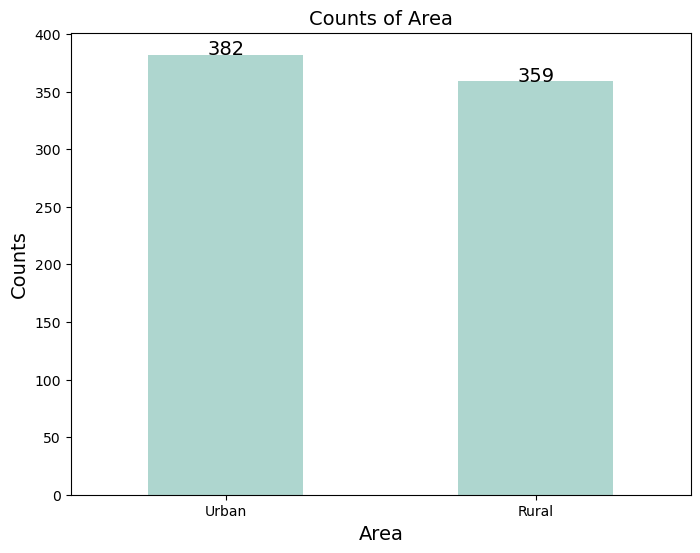

In [30]:
ax = df['area'].value_counts().plot(
    kind='bar',
    figsize=(8, 6),
    color='#AED6CF'
)

for i in ax.patches:
    ax.annotate(
        str(int(i.get_height())),                
        (i.get_x() + i.get_width() / 2., i.get_height()), 
        ha='center', 
        fontsize=14, 
        color='k'
    )

plt.title('Counts of Area', fontsize=14)
plt.xlabel('Area', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=0)
plt.show()

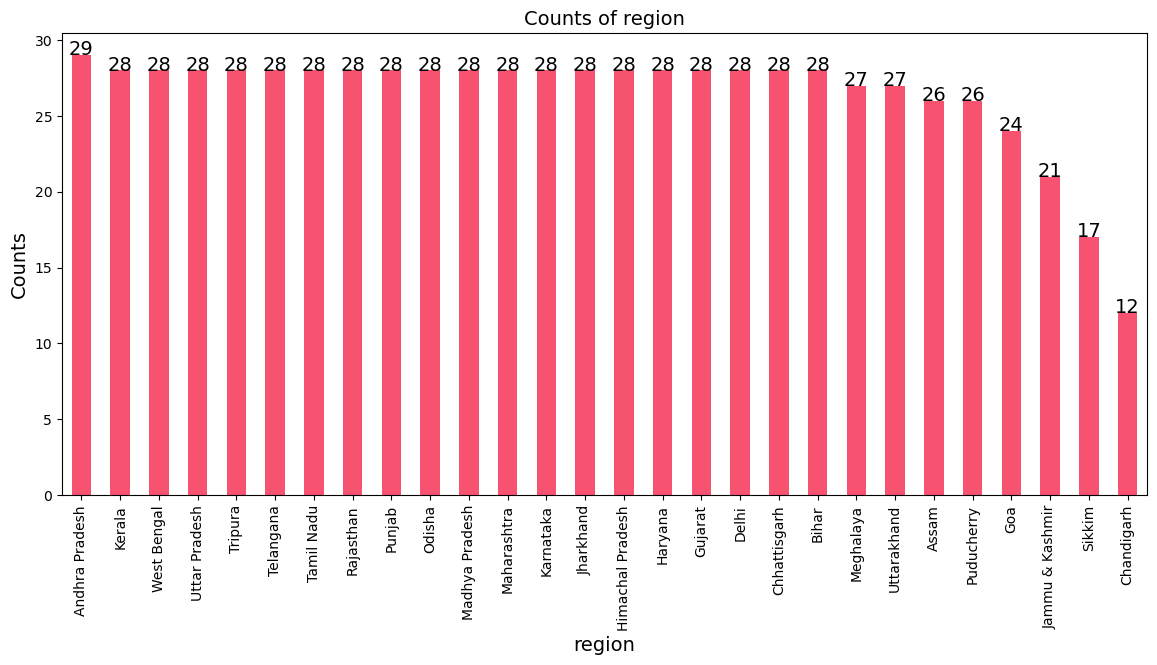

In [31]:
ax = df['region'].value_counts().plot(
    kind='bar',
    figsize=(14, 6),
    color='#F75270'
)

for i in ax.patches:
    ax.annotate(
        str(int(i.get_height())),                
        (i.get_x() + i.get_width() / 2., i.get_height()), 
        ha='center', 
        fontsize=14, 
        color='k'
    )

plt.title('Counts of region', fontsize=14)
plt.xlabel('region', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=90)
plt.show()

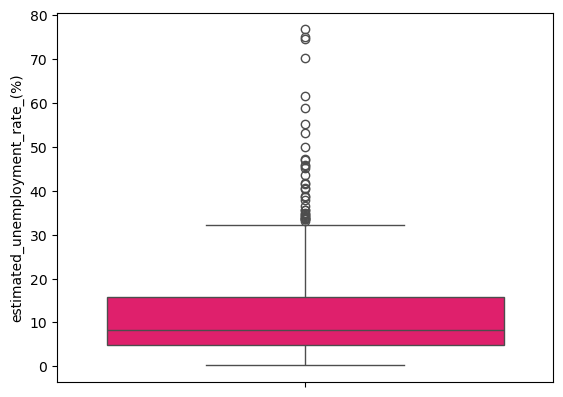

In [32]:
sns.boxplot(data = df, y = 'estimated_unemployment_rate_(%)', color = '#FF0066')
plt.show()

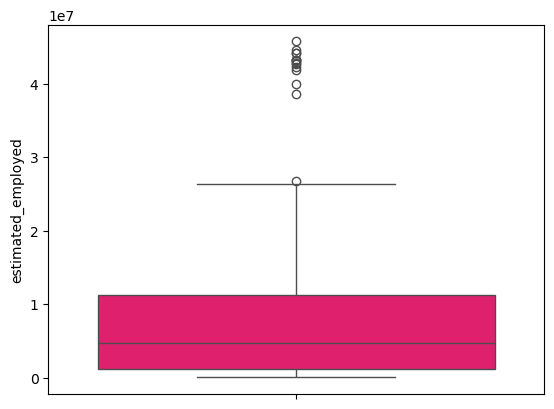

In [33]:
sns.boxplot(data = df, y = 'estimated_employed', color = '#FF0066')
plt.show()

In [34]:
Q1 = df['estimated_employed'].quantile(0.25)
Q2 = df['estimated_employed'].quantile(0.50)
Q3 = df['estimated_employed'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_estimated_employed = df[(df['estimated_employed'] < lower_bound) | (df['estimated_employed'] > upper_bound)]
len(outliers_estimated_employed)

15

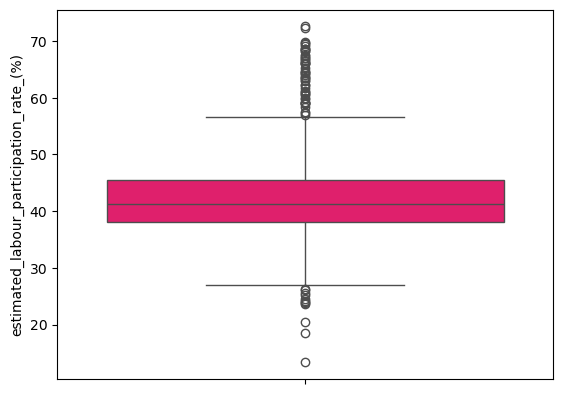

In [35]:
sns.boxplot(data = df, y = 'estimated_labour_participation_rate_(%)', color = '#FF0066')
plt.show()

In [36]:
Q1 = df['estimated_labour_participation_rate_(%)'].quantile(0.25)
Q2 = df['estimated_labour_participation_rate_(%)'].quantile(0.50)
Q3 = df['estimated_labour_participation_rate_(%)'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_estimated_labour_participation_rate = df[(df['estimated_labour_participation_rate_(%)'] < lower_bound) | (df['estimated_labour_participation_rate_(%)'] > upper_bound)]
len(outliers_estimated_labour_participation_rate)

63

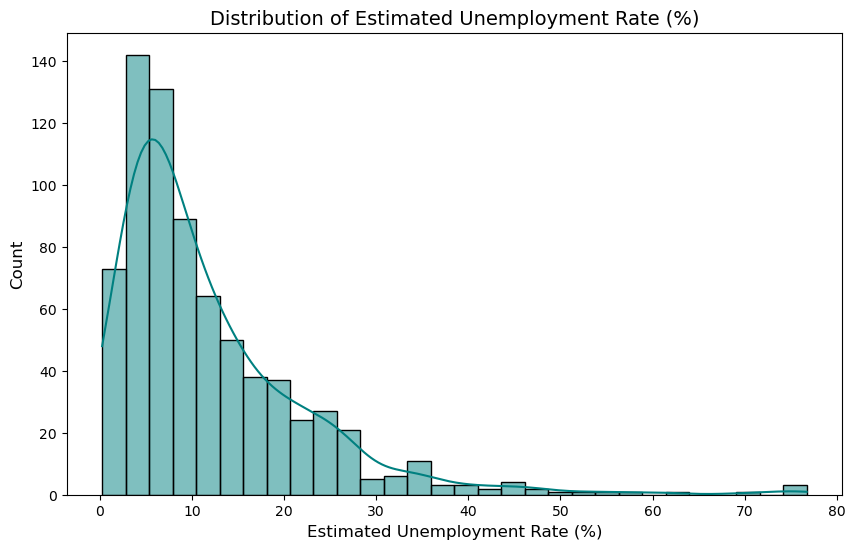

In [37]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='estimated_unemployment_rate_(%)', bins=30, kde=True, color='teal')
plt.title('Distribution of Estimated Unemployment Rate (%)', fontsize=14)
plt.xlabel('Estimated Unemployment Rate (%)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

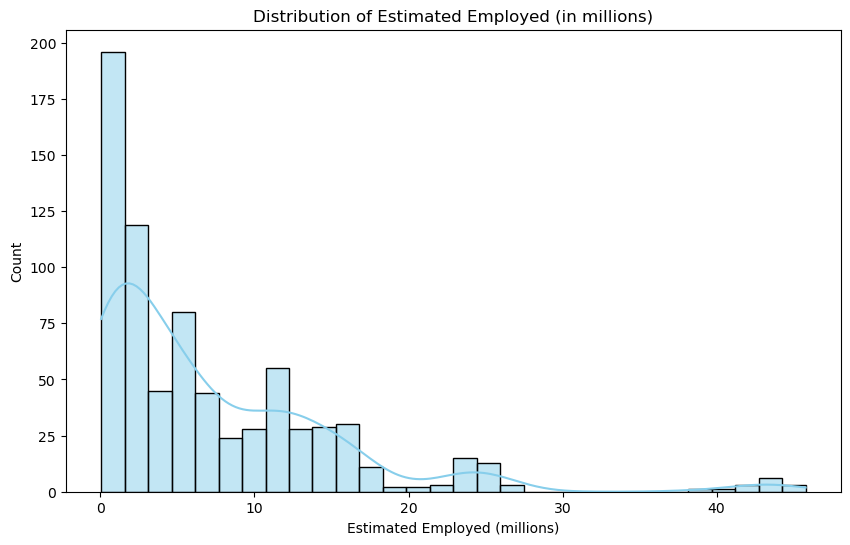

In [38]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x=df['estimated_employed'] / 1e6, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Estimated Employed (in millions)')
plt.xlabel('Estimated Employed (millions)')
plt.ylabel('Count')
plt.show()

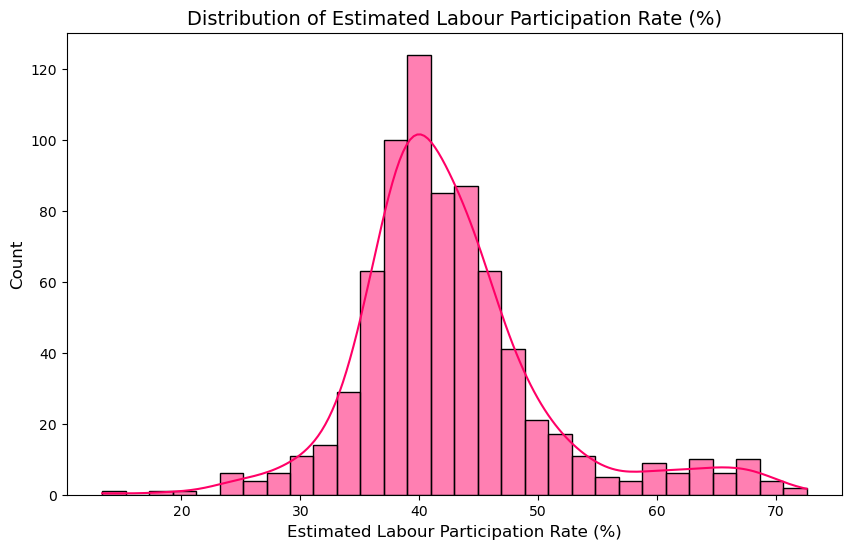

In [39]:
plt.figure(figsize=(10,6))
sns.histplot(
    data=df, 
    x='estimated_labour_participation_rate_(%)', 
    kde=True, 
    bins=30, 
    color='#FF0066'
)
plt.title('Distribution of Estimated Labour Participation Rate (%)', fontsize=14)
plt.xlabel('Estimated Labour Participation Rate (%)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

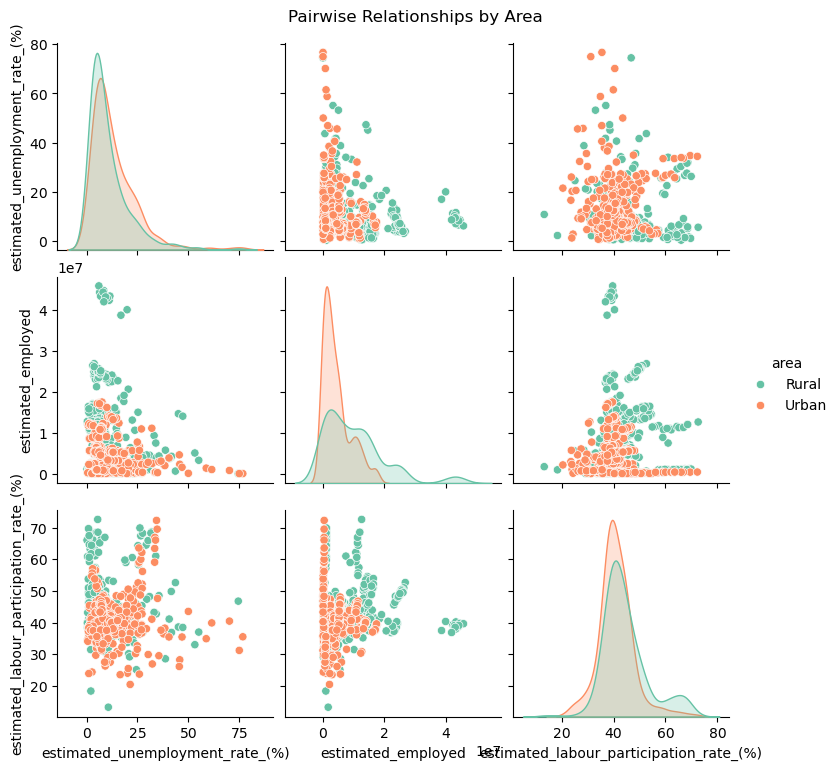

In [40]:
sns.pairplot(
    data = df, 
    vars=['estimated_unemployment_rate_(%)', 'estimated_employed', 'estimated_labour_participation_rate_(%)'], 
    hue='area', 
    diag_kind='kde', 
    palette='Set2'
)
plt.suptitle("Pairwise Relationships by Area", y=1.02)
plt.show()

<Axes: >

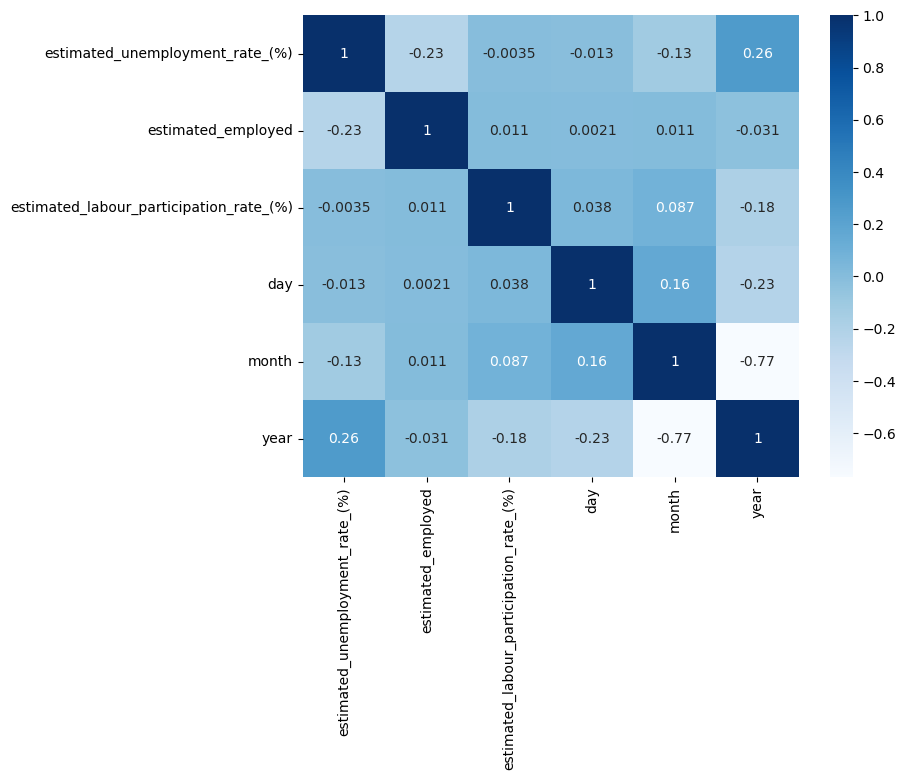

In [41]:
corr_num = df.select_dtypes(include = 'number').corr()

plt.figure(figsize = (8, 6))
sns.heatmap(corr_num, annot = True, fmt='.2g', cmap = 'Blues')

In [42]:
unemployment_by_region = (
    df.groupby('region')['estimated_unemployment_rate_(%)']
    .mean()
    .reset_index()
    .sort_values(by='estimated_unemployment_rate_(%)', ascending=False)
)

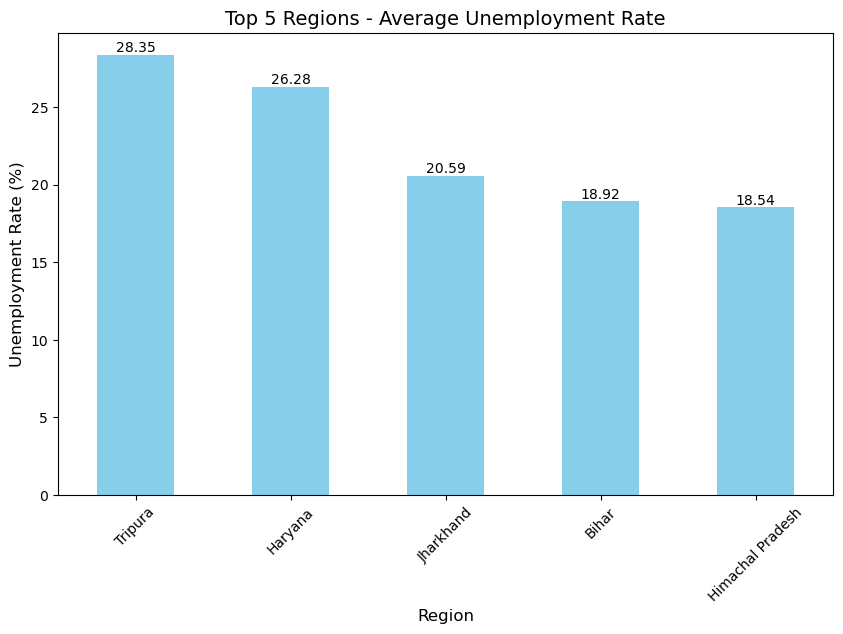

In [43]:
ax = unemployment_by_region.head().plot(
    kind='bar',
    x='region',
    y='estimated_unemployment_rate_(%)',
    figsize=(10,6),
    legend=False,
    color='skyblue'
)

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.2f'),  
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.title("Top 5 Regions - Average Unemployment Rate", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Unemployment Rate (%)", fontsize=12)
plt.xticks(rotation=45)

plt.show()

In [44]:
unemployment_by_month = df.groupby(['year','month'])['estimated_unemployment_rate_(%)'].mean().reset_index()

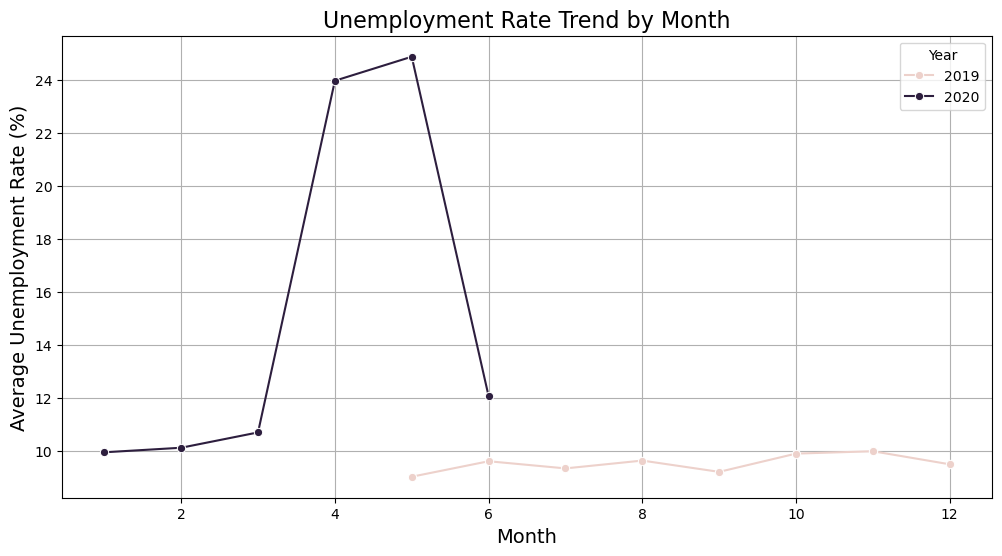

In [45]:
plt.figure(figsize=(12,6))
sns.lineplot(data=unemployment_by_month, 
             x='month', 
             y='estimated_unemployment_rate_(%)', 
             hue='year', 
             marker='o')

plt.title("Unemployment Rate Trend by Month", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Average Unemployment Rate (%)", fontsize=14)
plt.legend(title='Year')
plt.grid(True)
plt.show()

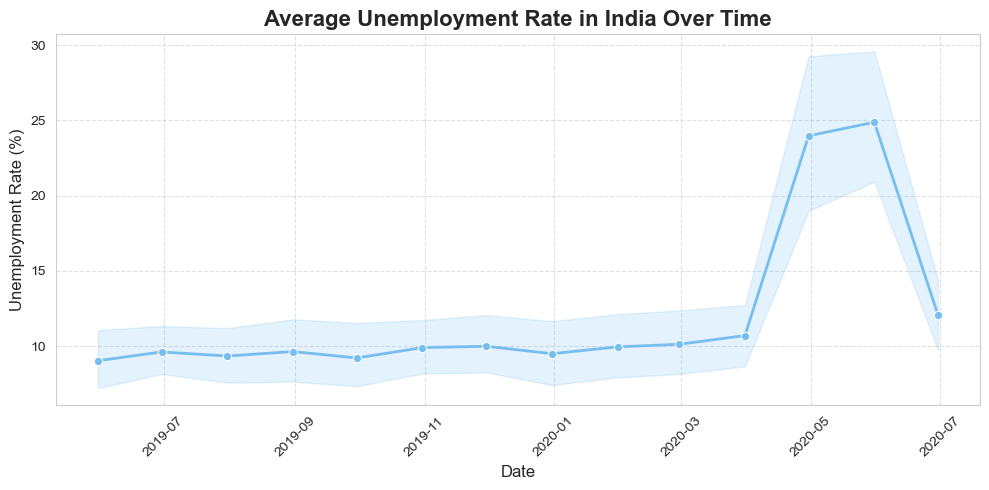

In [46]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))

sns.lineplot(
    data=df,
    x='date', 
    y='estimated_unemployment_rate_(%)',
    marker='o',
    color='#77BEF0',
    linewidth=2
)

plt.title('Average Unemployment Rate in India Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

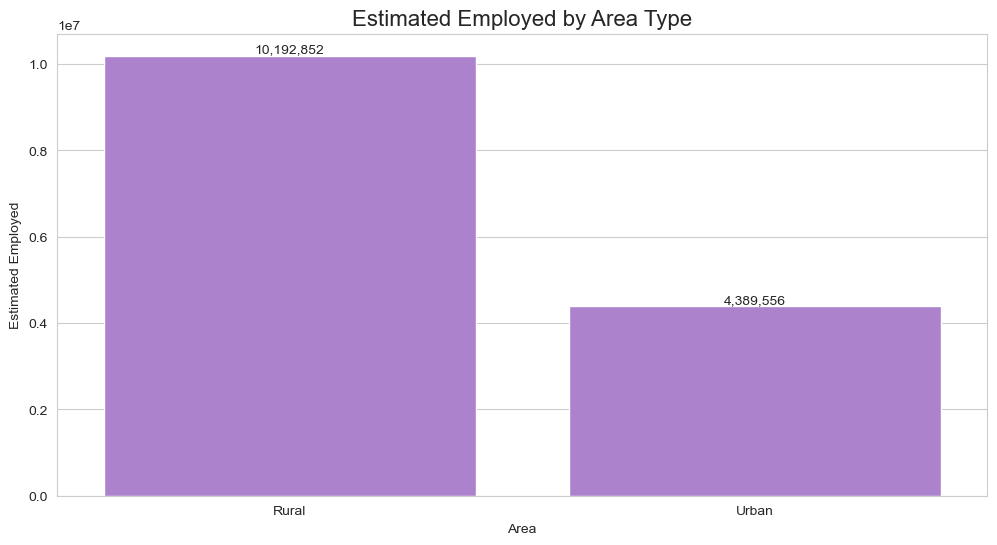

In [47]:
plt.figure(figsize = (12, 6))
ax = sns.barplot(data=df, x='area', y='estimated_employed', color='#AE75DA', errorbar=('ci', False))

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height):,}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=10)

plt.title("Estimated Employed by Area Type", fontsize=16)
plt.xlabel("Area")
plt.ylabel("Estimated Employed")
plt.show()

### Feature Engineering

In [49]:
df['labour_force'] = df['estimated_employed'] / (1 - (df['estimated_unemployment_rate_(%)'] / 100))

In [50]:
df['unemployed'] = df['labour_force'] - df['estimated_employed']

In [51]:
total_employed = df['estimated_employed'].sum()
total_unemployed = df['unemployed'].sum()
total_labour_force = df['labour_force'].sum()

employed_pct = (total_employed / total_labour_force) * 100
unemployed_pct = (total_unemployed / total_labour_force) * 100

print("Employed Percentage: ", employed_pct)
print("Unemployed Percentage: ", unemployed_pct)

Employed Percentage:  90.04251520237564
Unemployed Percentage:  9.957484797624367


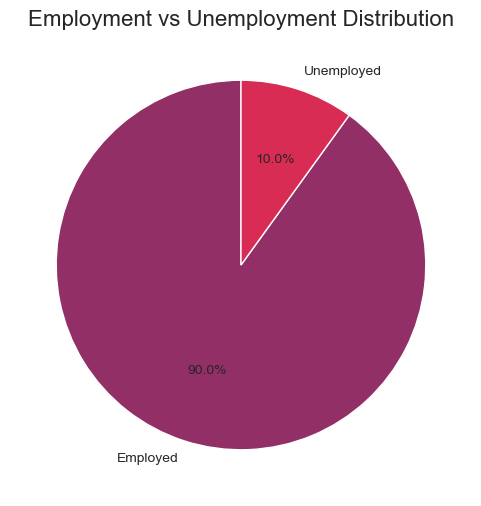

In [52]:
plt.figure(figsize=(6,6))
plt.pie([employed_pct, unemployed_pct],
        labels=['Employed', 'Unemployed'],
        autopct='%1.1f%%',
        colors=['#932F67','#D92C54'],
        startangle=90)
plt.title("Employment vs Unemployment Distribution", fontsize=16)
plt.show()

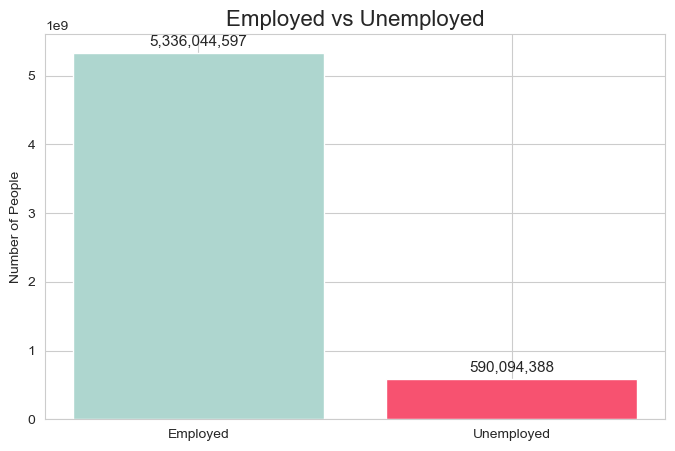

In [ ]:
categories = ['Employed', 'Unemployed']
values = [total_employed, total_unemployed]
colors = ['#AED6CF', '#F75270']

plt.figure(figsize=(8,5))
bars = plt.bar(categories, values, color=colors)

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height):,}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0,3),
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=11)

plt.title("Employed vs Unemployed", fontsize=16)
plt.ylabel("Number of People")
plt.show()gq

In [54]:
df.drop(['frequency'], axis = 1, inplace = True)